In [1]:
import os
import sys
sys.path.append('common')
import util, audio_preprocessing

import shutil
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard
from matplotlib import pyplot as plt
%matplotlib inline
from cyclic_lr import CyclicLR

from dataset import SingleDataset, MultiDataset
from model import model_mlt_cnn_alexnet

TRY = 'MIX6'
LOG_DIR = './%slog' % TRY
SCD_PREFIX = 'scd_'
USD_PREFIX = 'usd_'

batch_size = 32
epochs = 150

scd = SingleDataset(SCD_PREFIX,
                   util.load_txt_list(os.path.join('.', SCD_PREFIX+'classes.txt')),
                   batch_size)
usd = SingleDataset(USD_PREFIX,
                   ['air_conditioner',  'car_horn', 'children_playing', 'dog_bark', 'drilling',
                    'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music'],
                   batch_size)

Using TensorFlow backend.


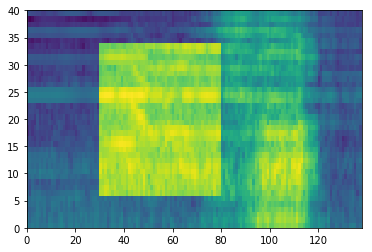

In [2]:
multi = MultiDataset([scd, usd], x_mix_ratio=[0.6, 0.4], mix_randomness=0.2)

# Confirmation
def plot_dataset(X, n=1):
    for i in range(n):
        x = X[i]
        plt.pcolormesh(x[..., -1])
        plt.show()
X = next(multi.train_generator)[0]
plot_dataset(X)

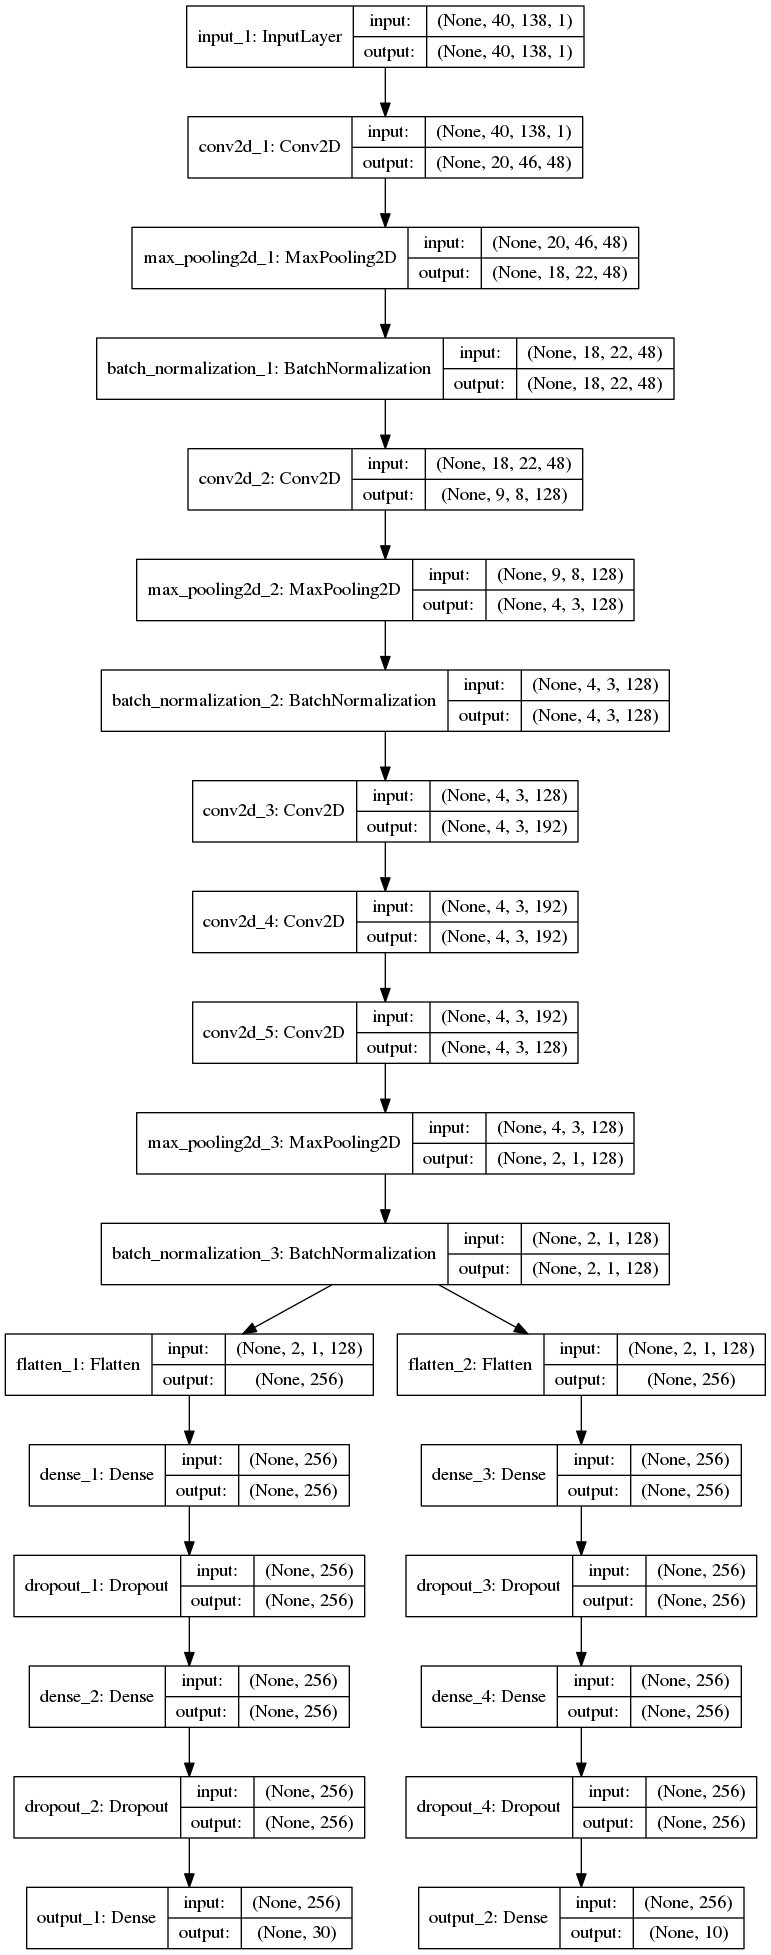

In [3]:
model = model_mlt_cnn_alexnet(multi.input_shape(), multi.ys_classes())
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
#model.summary()
from keras.utils import plot_model
plot_model(model, to_file='structure%s.png' % TRY, show_shapes=True)
from IPython.display import Image
Image(filename='structure%s.png' % TRY) 

In [6]:
callbacks = [
    CyclicLR(base_lr=0.00007, max_lr=0.0007, step_size=multi.train_steps_per_epoch, mode='triangular'),
    ModelCheckpoint('model%s.h5' % TRY,
                monitor='val_output_1_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
     keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)
]

# Clean up log
shutil.rmtree(LOG_DIR, ignore_errors=True)

model.fit_generator(multi.train_generator,
                    steps_per_epoch=multi.train_steps_per_epoch,
                    epochs=epochs,
                    validation_data=multi.valid_generator, 
                    validation_steps=multi.valid_steps_per_epoch,
                    callbacks=callbacks)

Epoch 1/150
1595/1596 [============================>.] - ETA: 0s - loss: 2.9673 - output_1_loss: 2.0638 - output_2_loss: 0.9035 - output_1_acc: 0.0409 - output_2_acc: 0.1640
Epoch 00001: val_output_1_acc improved from -inf to 0.06279, saving model to modelMIX6.h5
1596/1596 [==============================] - 73s 46ms/step - loss: 2.9672 - output_1_loss: 2.0637 - output_2_loss: 0.9035 - output_1_acc: 0.0410 - output_2_acc: 0.1640 - val_loss: 2.8123 - val_output_1_loss: 1.9895 - val_output_2_loss: 0.8229 - val_output_1_acc: 0.0628 - val_output_2_acc: 0.2726
Epoch 2/150
1595/1596 [============================>.] - ETA: 0s - loss: 2.8096 - output_1_loss: 1.9643 - output_2_loss: 0.8452 - output_1_acc: 0.0752 - output_2_acc: 0.2427
Epoch 00002: val_output_1_acc improved from 0.06279 to 0.16397, saving model to modelMIX6.h5
1596/1596 [==============================] - 72s 45ms/step - loss: 2.8097 - output_1_loss: 1.9644 - output_2_loss: 0.8453 - output_1_acc: 0.0753 - output_2_acc: 0.2428 - va

1595/1596 [============================>.] - ETA: 0s - loss: 2.0633 - output_1_loss: 1.3183 - output_2_loss: 0.7450 - output_1_acc: 0.5578 - output_2_acc: 0.3947
Epoch 00031: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 2.0629 - output_1_loss: 1.3181 - output_2_loss: 0.7448 - output_1_acc: 0.5578 - output_2_acc: 0.3948 - val_loss: 1.1985 - val_output_1_loss: 0.5019 - val_output_2_loss: 0.6965 - val_output_1_acc: 0.8028 - val_output_2_acc: 0.3715
Epoch 32/150
1595/1596 [============================>.] - ETA: 0s - loss: 2.0665 - output_1_loss: 1.3238 - output_2_loss: 0.7428 - output_1_acc: 0.5553 - output_2_acc: 0.3918
Epoch 00032: val_output_1_acc improved from 0.83924 to 0.84296, saving model to modelMIX6.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 2.0666 - output_1_loss: 1.3237 - output_2_loss: 0.7428 - output_1_acc: 0.5553 - output_2_acc: 0.3918 - val_loss: 1.0874 - val_output_1_loss: 0.4115 - val_output

Epoch 47/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9962 - output_1_loss: 1.2662 - output_2_loss: 0.7300 - output_1_acc: 0.5951 - output_2_acc: 0.4177
Epoch 00047: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9954 - output_1_loss: 1.2657 - output_2_loss: 0.7297 - output_1_acc: 0.5951 - output_2_acc: 0.4177 - val_loss: 1.0806 - val_output_1_loss: 0.4036 - val_output_2_loss: 0.6769 - val_output_1_acc: 0.8421 - val_output_2_acc: 0.3945
Epoch 48/150
1594/1596 [============================>.] - ETA: 0s - loss: 2.0019 - output_1_loss: 1.2666 - output_2_loss: 0.7354 - output_1_acc: 0.5958 - output_2_acc: 0.4173
Epoch 00048: val_output_1_acc improved from 0.86055 to 0.86595, saving model to modelMIX6.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 2.0014 - output_1_loss: 1.2663 - output_2_loss: 0.7351 - output_1_acc: 0.5957 - output_2_acc: 0.4173 - val_loss: 1.0144 - val_output_1_loss: 0.3571

Epoch 63/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9282 - output_1_loss: 1.2160 - output_2_loss: 0.7122 - output_1_acc: 0.6196 - output_2_acc: 0.4309
Epoch 00063: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.9290 - output_1_loss: 1.2165 - output_2_loss: 0.7125 - output_1_acc: 0.6196 - output_2_acc: 0.4309 - val_loss: 1.0079 - val_output_1_loss: 0.3543 - val_output_2_loss: 0.6537 - val_output_1_acc: 0.8588 - val_output_2_acc: 0.4114
Epoch 64/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.9573 - output_1_loss: 1.2366 - output_2_loss: 0.7207 - output_1_acc: 0.6164 - output_2_acc: 0.4331
Epoch 00064: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9573 - output_1_loss: 1.2366 - output_2_loss: 0.7207 - output_1_acc: 0.6165 - output_2_acc: 0.4331 - val_loss: 0.9750 - val_output_1_loss: 0.3292 - val_output_2_loss: 0.6458 - val_output_1_acc

Epoch 79/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9102 - output_1_loss: 1.2014 - output_2_loss: 0.7088 - output_1_acc: 0.6393 - output_2_acc: 0.4476
Epoch 00079: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9099 - output_1_loss: 1.2012 - output_2_loss: 0.7087 - output_1_acc: 0.6394 - output_2_acc: 0.4476 - val_loss: 1.0064 - val_output_1_loss: 0.3568 - val_output_2_loss: 0.6496 - val_output_1_acc: 0.8604 - val_output_2_acc: 0.4191
Epoch 80/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.9192 - output_1_loss: 1.2099 - output_2_loss: 0.7092 - output_1_acc: 0.6330 - output_2_acc: 0.4468
Epoch 00080: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9191 - output_1_loss: 1.2098 - output_2_loss: 0.7093 - output_1_acc: 0.6331 - output_2_acc: 0.4467 - val_loss: 0.9403 - val_output_1_loss: 0.3078 - val_output_2_loss: 0.6326 - val_output_1_acc

Epoch 95/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8915 - output_1_loss: 1.1882 - output_2_loss: 0.7034 - output_1_acc: 0.6474 - output_2_acc: 0.4505
Epoch 00095: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8911 - output_1_loss: 1.1879 - output_2_loss: 0.7032 - output_1_acc: 0.6474 - output_2_acc: 0.4505 - val_loss: 1.0054 - val_output_1_loss: 0.3297 - val_output_2_loss: 0.6758 - val_output_1_acc: 0.8740 - val_output_2_acc: 0.4129
Epoch 96/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.9058 - output_1_loss: 1.2005 - output_2_loss: 0.7054 - output_1_acc: 0.6425 - output_2_acc: 0.4535
Epoch 00096: val_output_1_acc improved from 0.88983 to 0.89381, saving model to modelMIX6.h5
1596/1596 [==============================] - 74s 46ms/step - loss: 1.9056 - output_1_loss: 1.2003 - output_2_loss: 0.7052 - output_1_acc: 0.6425 - output_2_acc: 0.4535 - val_loss: 0.9316 - val_output_1_loss: 0.2869

Epoch 111/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8788 - output_1_loss: 1.1791 - output_2_loss: 0.6997 - output_1_acc: 0.6534 - output_2_acc: 0.4625
Epoch 00111: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8796 - output_1_loss: 1.1797 - output_2_loss: 0.6999 - output_1_acc: 0.6534 - output_2_acc: 0.4626 - val_loss: 0.9689 - val_output_1_loss: 0.3092 - val_output_2_loss: 0.6597 - val_output_1_acc: 0.8815 - val_output_2_acc: 0.4212
Epoch 112/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8581 - output_1_loss: 1.1691 - output_2_loss: 0.6891 - output_1_acc: 0.6521 - output_2_acc: 0.4568
Epoch 00112: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8580 - output_1_loss: 1.1690 - output_2_loss: 0.6890 - output_1_acc: 0.6522 - output_2_acc: 0.4567 - val_loss: 0.9281 - val_output_1_loss: 0.2955 - val_output_2_loss: 0.6327 - val_output_1_a

Epoch 127/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8515 - output_1_loss: 1.1627 - output_2_loss: 0.6888 - output_1_acc: 0.6579 - output_2_acc: 0.4725
Epoch 00127: val_output_1_acc did not improve
1596/1596 [==============================] - 74s 46ms/step - loss: 1.8515 - output_1_loss: 1.1628 - output_2_loss: 0.6888 - output_1_acc: 0.6578 - output_2_acc: 0.4724 - val_loss: 0.9745 - val_output_1_loss: 0.3301 - val_output_2_loss: 0.6444 - val_output_1_acc: 0.8703 - val_output_2_acc: 0.4411
Epoch 128/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8687 - output_1_loss: 1.1726 - output_2_loss: 0.6962 - output_1_acc: 0.6570 - output_2_acc: 0.4670
Epoch 00128: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8689 - output_1_loss: 1.1727 - output_2_loss: 0.6962 - output_1_acc: 0.6571 - output_2_acc: 0.4670 - val_loss: 0.9027 - val_output_1_loss: 0.2802 - val_output_2_loss: 0.6224 - val_output_1_a

Epoch 143/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8413 - output_1_loss: 1.1547 - output_2_loss: 0.6865 - output_1_acc: 0.6642 - output_2_acc: 0.4733
Epoch 00143: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8412 - output_1_loss: 1.1547 - output_2_loss: 0.6865 - output_1_acc: 0.6642 - output_2_acc: 0.4734 - val_loss: 0.9369 - val_output_1_loss: 0.2982 - val_output_2_loss: 0.6387 - val_output_1_acc: 0.8837 - val_output_2_acc: 0.4282
Epoch 144/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8399 - output_1_loss: 1.1555 - output_2_loss: 0.6844 - output_1_acc: 0.6653 - output_2_acc: 0.4692
Epoch 00144: val_output_1_acc did not improve
1596/1596 [==============================] - 73s 46ms/step - loss: 1.8396 - output_1_loss: 1.1553 - output_2_loss: 0.6842 - output_1_acc: 0.6653 - output_2_acc: 0.4691 - val_loss: 0.8967 - val_output_1_loss: 0.2733 - val_output_2_loss: 0.6234 - val_output_1_a

## Evaluate per dataset

In [7]:
model.load_weights('model%s.h5' % TRY)
multi.evaluate_by_datasets(model)

Evaluating scd_dataset
6798/6798 [==============================] - 11s 2ms/step
 = 0.9338040600176523
Evaluating usd_dataset
990/990 [==============================] - 2s 2ms/step
 = 0.5303030303030303
Accuracy with scd_dataset = 0.933804
Accuracy with usd_dataset = 0.530303


[0.9338040600176523, 0.5303030303030303]

## Evaluate by mixed dataset

In [4]:
model.load_weights('model%s.h5' % TRY)
multi = MultiDataset([scd, usd], [0.6, 0.4], mix_randomness=0.0)
results = model.evaluate_generator(multi.valid_generator, steps=multi.valid_steps_per_epoch)
print(model.metrics_names, results)

['loss', 'output_1_loss', 'output_2_loss', 'output_1_acc', 'output_2_acc'] [0.8612686856073419, 0.26994236984951964, 0.5913263162255764, 0.8957370313302516, 0.48831535695942474]


[[ 9 15 21  6 22  5  4 11  9 20  1  7  8 15 10  5 19 27  7  5 11 12  1 27
   3 25  0 29 23 16  0 16]
 [ 4  4  4  7  4  4  4  4  4  4  4  4  1  4  8  4  4  4  4  4  4  4  4  4
   4  0  4  4  4  0  4  4]
 [ 9 15 21 28 22  5  5 26  9  6  1  2  8 15 10 23 19 27  7  5  6 12  1 27
   3 25 25  5 23 16 22 16]
 [ 9  4  0  0  2  7  2  4  0  9  8  2  1  2  8  2  3  8  2  2  8  0  2  5
   8  9  4  7  7  0  4  0]]


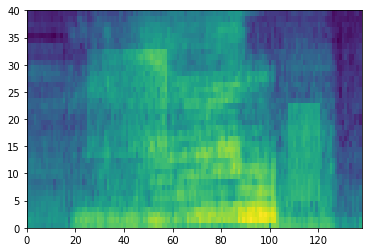

In [9]:
Xs, yss = next(multi.train_generator)
multi_preds = model.predict(Xs)
print(np.array([[np.argmax(pred) for pred in preds] for preds in multi_preds] + [[np.argmax(y) for y in ys] for ys in yss]))
plot_dataset(Xs)